## 컨볼루션 신경망 (CNN)

### 컨볼루션과 풀링층

- 완전연결층과 컨볼루션 신경망의 차이
  - 완전연결층은 1차원 배열 형태로 학습
    - 이미지를 펼쳐서 사용 -> 픽셀 사이의 관계 고려 X
    - 2차원 -> 1차원으로 변경 -> 본래 데이터 특성을 잃음

- 완전연결층은 각각의 특성이아닌 전체(전역 특징)을 학습
  - 각각의 내용물이 달라지는경우 다른것으로 인식
  - 공간정보 손실
  - 은닉 유닛 수를 늘려 해결 -> but, 과대적합 위험

- 컨볼루션층은 이미지 픽셀 사이의 관계 고려 -> 지역적 특징을 학습
  - 지역적 특징이란, 빵밑에 패티가 있고 다시 그밑에 패티가 잇거나 눈옆의 코 밑에 입이있는것
  - 공간정보를 유지
  - 완전연결층에 비해 적은 파라미터 수를 요구


- 요구되는 파라미터 수 차이
  - 단편적 관점으로 Dense, Conv2D층을 봤을 때

  128개 은닉 유닛 사용한 Dense -> 약 10만

  Conv2D는 1000개

### 컨볼루션 필터
- 필터 개념 사용
- 사진앱의 필터 -> 이미지 필터

- 컨볼루션 필터는 학습을 통해 파라미터가 조정됨 like 가중치

- 이미지 필터 실습
  - 가장자리 컴출(edge-detection)에서 매우 유명한 소벨필터(Sobel-Filte)를 사용
  - 소벨 필터의 파라미터를 직접 정의할 것

4431872/4422102 [==============================] - 0s 0us/step


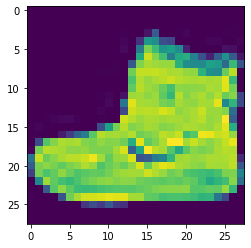

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [2]:
import numpy as np
import cv2

# 가로선을 추출하기 위한 필터
horizontal_filter = np.array([[1.,2.,1.],
                              [0.,0.,0.],
                              [-1.,-2.,-1.]])

# 세로선을 추출하기 위한 필터
vertical_filter = np.array([[1.,0.,-1.],
                              [2.,0.,-2.],
                              [1.,0.,-1.]])

# 계산의 편의를 위해 이미지의 크기를 (27,27)로 변경
test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size =  int((image_size -3)/1 + 1)

print('output의 크기 : %d'% output_size)

output의 크기 : 25


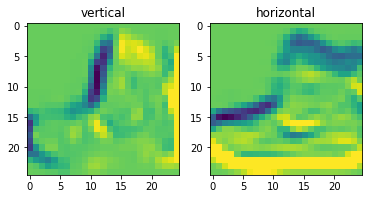

In [4]:
filter_size = 3

def get_filtered_image(filter):
  filtered_image = np.zeros((output_size, output_size))

  for i in range(output_size):
    for j in range(output_size):
      # 합성곱 연산
      indice_image = test_image[i:(i+filter_size),
                                j:(j+filter_size)] * filter
      indice_sum = np.sum(indice_image)
      if(indice_sum > 255):
        indice_sum = 255
      filtered_image[i,j] = indice_sum

  return filtered_image

vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()

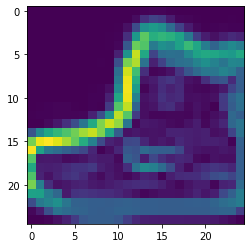

In [5]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) +
                      np.square(vertical_filtered_image))

plt.imshow(sobel_image)

## - 컨볼루션 연산에서 주로 사용되는 용어
  - 컨볼루션 연산 : Convolution
  - 스트라이드 : Stride
  - 패딩 : padding

### - 컨볼루션 연산과 스트라이드
  - 컨볼루션층은 주어진 입력 데이터에서 컨볼루션 필터를 활용하여 원소별 곱과 윈도우슬라이딩을 행하는 컨볼루션 연산을 통해 특징맵을 만듬


- 패딩(Padding)
  - 특징맵의 크기가 감소하지 않고, 입력 데이터의 형태와 동일한 형태를 출력값으로 얻고 싶은 경우
  - 이미지의 가장자리에 해당하는 정보 손실 방지


## Conv2D 하이퍼 파라미터
  - filter = 특징맵 차원을 결정, 특징맵 형태는 배치사이즈, 로우, 컬럼, 필터
  - kernel_size :(3,3) 같이 튜플 형태로 필터 크기 설정 하나의 숫자k를 전달할 경우(k,k)
  - stride : 스트라이드 크기 
  - padding : 패딩에 대한 결정 여부 지정, same은 패딩을 사용하여 입출력 형태가 동일하도록 하며 valid 는 패딩사용 X
  - activation : 사용할 활성화 함수를 문자열 또는 클래스 형태로 제공
  

## MaxPool2D 하이퍼 파라미터
  - pool_size : 풀링층에서 사용할 커널의 크기 설정=
  - stride : 스트라이드 크기 지정 값이 주어지지않는 경우 pool_size와 동일하게 측정
  - padding : 위와동일